# Visualizing E fields
E and B fields have rather complicated shapes, except for a very small number of special cases where the fields can be considered to be (approximately) constant.  Below we'll plot some fields with a focus on 2D slices.  The following plots will show the field strength only.  Plotting the vectors is more involved for arbitray fields shapes, so we'll skip that details here.  


You can find a tutorial on plotting vector fields here: https://krajit.github.io/sympy/vectorFields/vectorFields.html using matplotlib and numpy.   In ROOT we have to draw the vectors individually to create a similar plot.  Other packages, like Wolfram Alpha/Mathematics and GNUplot also offer features for plotting vectors at each point on your plot.  

## E field of a point charge using ROOT
Below we will use a 2D funcion to define the Efield in a plane containne the point charge.  We will 'plot' this function into a 2D histogram and then draw this histogram.  The classes used are:
* [TF2](https://root.cern.ch/doc/master/classTF2.html)
* [TH2F](https://root.cern.ch/doc/master/classTH2F.html)
* For details on plotting options, see ][THistPainter](https://root.cern.ch/doc/master/classTHistPainter.html)

In [1]:
import ROOT as R

Welcome to JupyROOT 6.22/00


In [2]:
# field of a point charge (ignoring k)
# charge is in x,y plane and field is calculate in x,y plane
# this function has 3 parameters:
# [0] = value of charge
# [1] = x-location of charge
# [2] = y-location of charge
Epoint = R.TF2("Epoint","[0]/((x-[1])**2+(y-[2])**2)",-3,3,-3,3)
Epoint.SetParameters(1,-.5,0)
Epoint.SetTitle("Efield of point charge;x;y")
# note avoid plotting the field on top of a point charge, where E~infinity!
Epoint.SetNpx(100)   # control the number of points sampled
Epoint.SetNpy(100)   
h1=Epoint.CreateHistogram()  # here we save a copy of the plot in a histogram

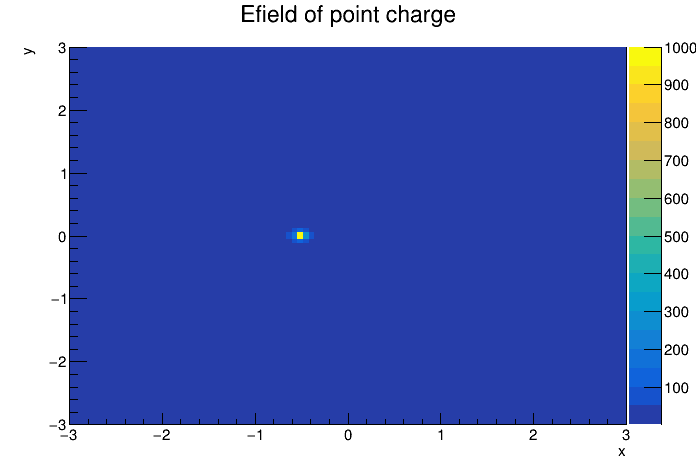

In [3]:
tc=R.TCanvas()
h1.Draw("colz")  # plot using a color map ('col' option) and show the scale ('z' option)
tc.Draw()

That's not very exciting.  The problem is that the field is very large near the charge and fall off quickly at large distances.  There are several ways to deal with this:
* Ignore it (a perfefect valid approach!) -- we may on care about numerical accuracy, not aesthetics.
* Adjust the 'contour thresholds' by hand to control the magnitudes where the colors change.  A good solution, but laborious.
* Let's take an easy way out, but ploting the log of the magnitude.  Then the default coilor scale, which is defined in linear steps, will show more detail and no custom tuning of the thresholds to the scale of the problem will be needed.

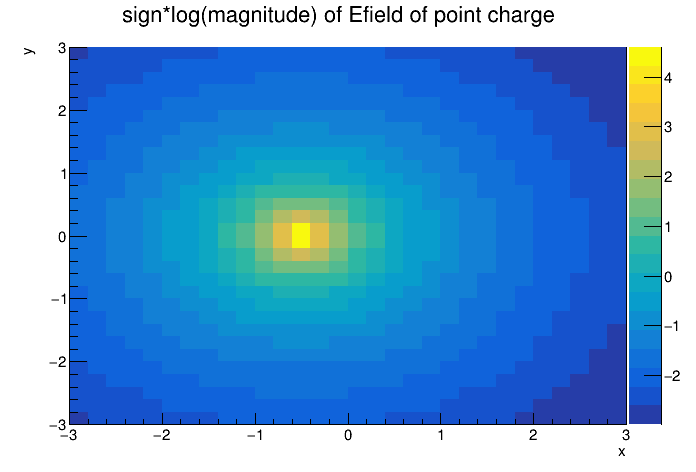

In [4]:
Epoint = R.TF2("Epoint","[0]/abs([0])*log(abs([0]/((x-[1])**2+(y-[2])**2)))",-3,3,-3,3)
Epoint.SetTitle("sign*log(magnitude) of Efield of point charge;x;y")
Epoint.SetParameters(1,-.5,0)
h1=Epoint.CreateHistogram()  # here we save a copy of the plot in a histogram
h1.Draw("colz")  # plot using a color map ('col' option) and show the scale ('z' option)
tc.Draw()

Now let's plot the field of a negative charge at a slightly different location

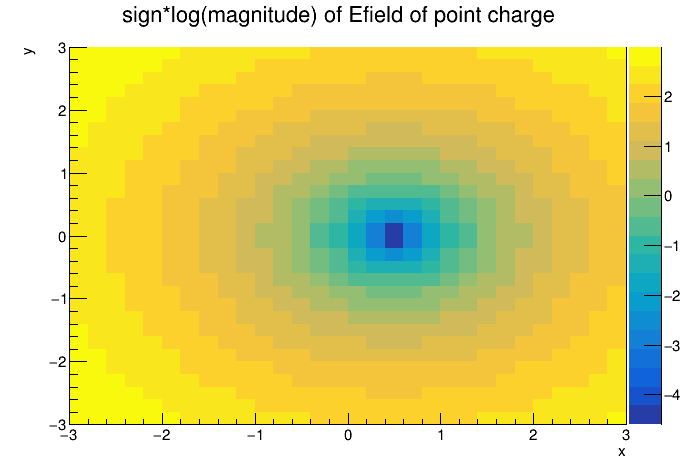

In [5]:
Epoint.SetParameters(-1,.5,0)
h2=Epoint.CreateHistogram()  
h2.Draw("colz")  
tc.Draw()

### A dipole field
Next we can take advantage of the fact that E fields are additive.  A positive and negative charge form a *dipole field*.  

In [6]:
hdipole=h1.Clone()    # make a copy of h1
hdipole.Add(h2)       # hdopole -> h1+h2

True

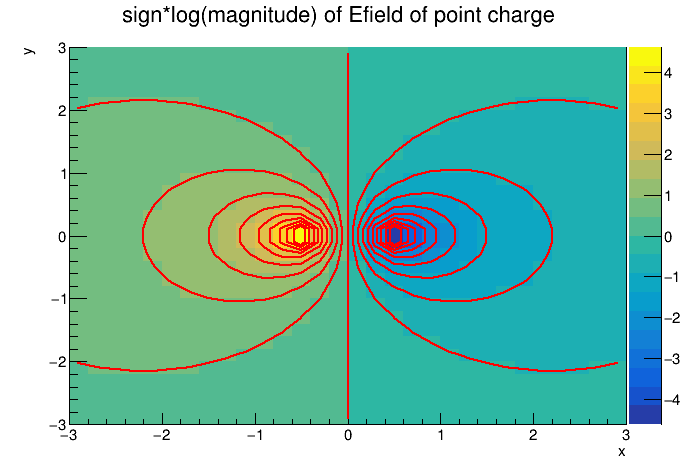

In [7]:
hdipole.Draw("colz")         # color map plot
hdipole.Draw("cont3,same")   # contour plot, notice that the "same" flag overlays the two plots
tc.Draw()

This is looking alright!  It's not perfectly smooth, but it was an easy plot to make, so that's a good start.

The contours above show lines of constant Efield strength.  Equivalently, these lines are **equipotentials**.  For the charge distribution shown, if we place a 3rd charge on a coutour, its eletrical potential energy will be the same anywhere on that contour.  We have not drawn the Efield direction vectors at each point, but the E field always points from larger E to smaller E, eg from yellow towards blue above.

## Plotting a field with Matplotlib

For Matplotlib, we need to generate arrays to devine the plot.  These arrays will define the points where the field is evaluated, the field strength, and possible the vector representing the field at each point.

We use Matplotlib tools:
* [scatter](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#) plot
* [pcolormesh](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.pcolormesh.html#matplotlib.pyplot.pcolormesh) color map plot
* [contour](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.contour.html#matplotlib.pyplot.contour) plot

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from math import atan2, sqrt, sin, cos, log

In [9]:
# the magnitude of the field, depends on distance from q to point in space

def E(q,x0,y0,x,y,scale=1):
    dx = x-x0
    dy = y-y0
    # tan theta = dx,dy
    theta = atan2(dy,dx)
    Emag = log(abs(q/(dx**2+dy**2)))*q/abs(q)   # for k=1 (this is just a scale factor in the plot)
    
    return Emag, Emag*cos(theta)*scale, Emag*sin(theta)*scale  # return the field strength and its x,y components

Ev = np.vectorize(E)   # the vectorize method turns out function into a numpy function.   
                       # So the input values can be arrays or single numbers!

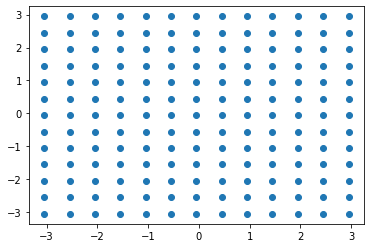

In [10]:
# place the point charge at -1,0
q1=+1
sq1=(-1,0)
# make a grid (-5..5) in steps of 0.5 along each axis
# note: we need to be careful that we don't plot that field at the location of the point charge
# kq/(r=0)^2 -> infininty!
x,y = np.meshgrid(np.arange(-3.05,3.15,.5),np.arange(-3.05,3.15,.5))  
# Here is a plot of what our grid looks like.
# We will evaluate the field at each point on the grid
plt.scatter(x,y);

In [11]:
# Now let's make a finer grid, so the plor is nicer
x,y = np.meshgrid(np.arange(-3.05,3.15,.1),np.arange(-3.05,3.15,.1))  

# array z holds Efield values; zx/zy hold x,y components
z,zx,zy=Ev(q1,sq1[0],sq1[1],x,y) 


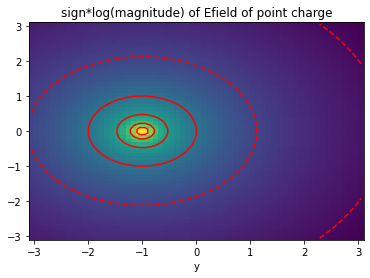

In [12]:
fig, ax = plt.subplots()
ax.set_title('sign*log(magnitude) of Efield of point charge')
ax.set_xlabel('x')
ax.set_xlabel('y')
ax.pcolormesh(x, y, z,shading='auto')
ax.contour(x, y, z, colors='r');

Now let's reproduce the dipole field.  We follow a similar approach as above:

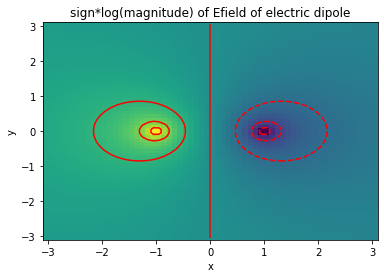

In [19]:
q2=-1
sq2=(1,0)
z2,z2x,z2y=Ev(q2,sq2[0],sq2[1],x,y) 
zd=z+z2
fig, ax = plt.subplots()
ax.set_title('sign*log(magnitude) of Efield of electric dipole')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.pcolormesh(x, y, zd,shading='auto')
ax.contour(x, y, zd, colors='r');

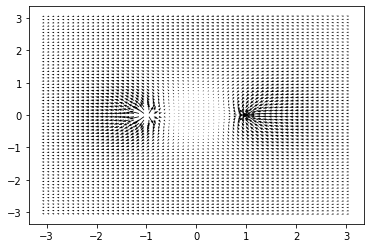

In [18]:
# we can draw the vector componets at each point on the grid using a quiver plot
# but this is not necesarilly giving us any better visual information
zdx = zx + z2x
zdy = zy + z2y

plt.quiver(x,y,zdx,zdy);

## Exercises

General you one plots of the following field configurations.  Choose your own ranges and plot styles to make the plots as informative as you can.  Make sure to lable youe plots clearly.  For each exercise, you may include one or more plots.  All charges will be placed in the x-y plane and the fields will also be plotting in the x-y plane.  Whenever you are asked to plot a group of charges distributed on a line of countour, distribute the charges uniformly and chose enough charges such their distance from one another is small compared to the scale of the problem.

### Plot 1
Plot the quadrupole electric field.  Charges are placed on the edges of a square.  The positive charges are on one diagonal, while the negative charges are on the other diagonal.  

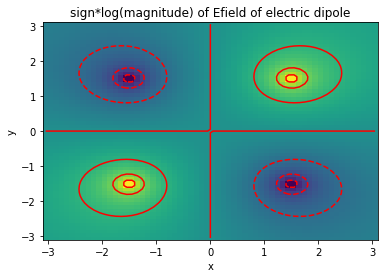

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from math import atan2, sqrt, sin, cos, log

finalField = 0
def E(q,x0,y0,x,y,scale=1):
    dx = x-x0
    dy = y-y0
    # tan theta = dx,dy
    theta = atan2(dy,dx)
    Emag = log(abs(q/(dx**2+dy**2)))*q/abs(q)   # for k=1 (this is just a scale factor in the plot)
    
    return Emag, Emag*cos(theta)*scale, Emag*sin(theta)*scale  # return the field strength and its x,y components

Ev = np.vectorize(E)   # the vectorize method turns out function into a numpy function.   
                       # So the input values can be arrays or single numbers!
d = 1.5
pX = [-d,-d,d,d]
pY = [-d,d,-d,d]
charges = [1,-1,-1,1]

x,y = np.meshgrid(np.arange(-3.05,3.15,.1),np.arange(-3.05,3.15,.1))

for a,b,charge in zip(pX, pY, charges):
    z1,z1x,z1y=Ev(charge,a,b,x,y)
    finalField += z1

fig, ax = plt.subplots()
ax.set_title('sign*log(magnitude) of Efield of electric dipole')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.pcolormesh(x, y, finalField,shading='auto')
ax.contour(x, y, finalField, colors='r');

### Plot 2
Distribute a line of equally spaced +charges the line from (-1,-10) to (-1,+10) and -charges from (1,-10) to (1,+10).   Plot the E field.

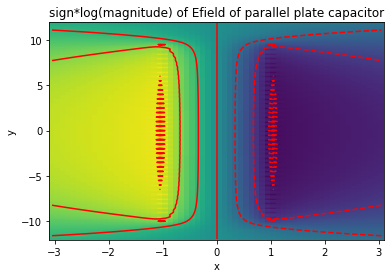

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from math import atan2, sqrt, sin, cos, log

finalField = 0
def E(q,x0,y0,x,y,scale=1):
    dx = x-x0
    dy = y-y0
    # tan theta = dx,dy
    theta = atan2(dy,dx)
    Emag = log(abs(q/(dx**2+dy**2)))*q/abs(q)   # for k=1 (this is just a scale factor in the plot)
    
    return Emag, Emag*cos(theta)*scale, Emag*sin(theta)*scale  # return the field strength and its x,y components

Ev = np.vectorize(E)   # the vectorize method turns out function into a numpy function.   
                       # So the input values can be arrays or single numbers!

x,y = np.meshgrid(np.arange(-3.05,3.15,.1),np.arange(-12,12,.1))

pX = [-1 for x in range(40)] + [1 for x in range(40)]
pY = np.append(np.arange(-10, 10, .5), np.arange(-10, 10, .5))
charges = [1 for x in range(40)] + [-1 for x in range(40)]

for a,b,charge in zip(pX, pY, charges):
    z1,z1x,z1y=Ev(charge,a,b,x,y)
    finalField += z1

fig, ax = plt.subplots()
ax.set_title('sign*log(magnitude) of Efield of parallel plate capacitor')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.pcolormesh(x, y, finalField,shading='auto')
ax.contour(x, y, finalField, colors='r');

### Plot 3
Distribute spaced +charges on a circle of radius 1.   Plot the E field.

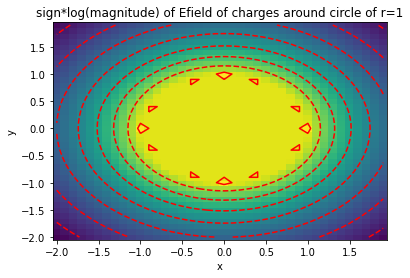

In [64]:
# your code hereimport matplotlib.pyplot as plt
import numpy as np
from math import atan2, sqrt, sin, cos, log, radians

finalField = 0
def E(q,x0,y0,x,y,scale=1):
    dx = x-x0
    dy = y-y0
    # tan theta = dx,dy
    theta = atan2(dy,dx)
    Emag = log(abs(q/(dx**2+dy**2)))*q/abs(q)   # for k=1 (this is just a scale factor in the plot)
    
    return Emag, Emag*cos(theta)*scale, Emag*sin(theta)*scale  # return the field strength and its x,y components

Ev = np.vectorize(E)   # the vectorize method turns out function into a numpy function.   
                       # So the input values can be arrays or single numbers!

x,y = np.meshgrid(np.arange(-2,2,.1),np.arange(-2,2,.1)) #create x,y grid points

pX, pY, charges = [],[],[] 

for angle in range(0, 360, 2):
    pX.append(1.000001*cos(radians(angle)))
    pY.append(1.000001*sin(radians(angle)))
    charges.append(1)

for a,b,charge in zip(pX, pY, charges):
    z1,z1x,z1y=Ev(charge,a,b,x,y)
    finalField += z1

fig, ax = plt.subplots()
ax.set_title('sign*log(magnitude) of Efield of charges around circle of r=1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.pcolormesh(x, y, finalField,shading='auto')
ax.contour(x, y, finalField, colors='r');

### Plot 4
Place 5 charges of value +q from -x to +x along a line at y=1.   Place a much large number of negative charges along the line -2x to +2x at y=0.  The sum of the charges on the lower line must sun to -5q.
Plot the E field.

38
38
38


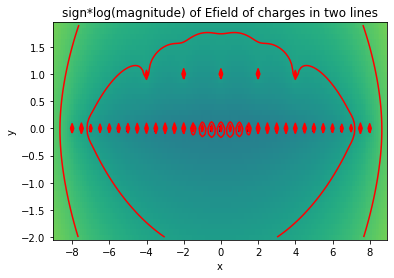

In [83]:
# your code hereimport matplotlib.pyplot as plt
import numpy as np
from math import atan2, sqrt, sin, cos, log, radians

finalField = 0
def E(q,x0,y0,x,y,scale=1):
    dx = x-x0
    dy = y-y0
    # tan theta = dx,dy
    theta = atan2(dy,dx)
    Emag = log(abs(q/(dx**2+dy**2)))*q/abs(q)   # for k=1 (this is just a scale factor in the plot)
    
    return Emag, Emag*cos(theta)*scale, Emag*sin(theta)*scale  # return the field strength and its x,y components

Ev = np.vectorize(E)   # the vectorize method turns out function into a numpy function.   
                       # So the input values can be arrays or single numbers!

x,y = np.meshgrid(np.arange(-9,9,.1),np.arange(-2,2,.1)) #create x,y grid points

pX = [x/4 for x in range(-32, 34, 2)] + [-4, -2, 0, 2, 4] #lists are organized by coordinates of bottom row first + top row on the end
pY = 33*[0] + 5*[1]
charges = 33*[-1/32] + 5*[1]

for a,b,charge in zip(pX, pY, charges):
    z1,z1x,z1y=Ev(charge,a,b,x,y)
    finalField += z1

fig, ax = plt.subplots()
ax.set_title('sign*log(magnitude) of Efield of charges in two lines')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.pcolormesh(x, y, finalField,shading='auto')
ax.contour(x, y, finalField, colors='r');